In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# modelnames = ['Complex_Watson','Complex_ACG']
# from src.helper_functions import calc_NMI

In [95]:
#rank data (only complex ACG)
dfREST = pd.DataFrame()
dfMOTORSOCIAL = pd.DataFrame()
sets = ['train','test1','test2']
new_setnames = ['Train','Within-subject test','Out-of-sample test']
modelname = 'Complex_ACG'
# for m,modelname in enumerate(modelnames[1:]):
for rank in np.arange(1,40,2).astype(int):
    for s,setname in enumerate(sets):
        if s==0:
            sum_ll = np.zeros((10))
            for inner in np.arange(10):
                ll = np.loadtxt('../data/results/116_results/lls/REST1REST2rank_realdata_'+modelname+'_K=1_rank='+str(rank)+'_'+setname+'_ll_inner'+str(inner)+'.txt')
                sum_ll[inner] = np.sum(ll)
            best_inner_rest = np.argmax(sum_ll)
        ll = np.loadtxt('../data/results/116_results/lls/REST1REST2rank_realdata_'+modelname+'_K=1_rank='+str(rank)+'_'+setname+'_ll_inner'+str(best_inner_rest)+'.txt')
        df_tmp = pd.DataFrame()
        df_tmp['loglik'] = ll
        df_tmp['dataset'] = new_setnames[s]
        df_tmp['rank'] = rank
        df_tmp['modelname'] = modelname
        if s==2:
            df_tmp['subject'] = np.arange(1,100+1)
        else:
            df_tmp['subject'] = np.arange(1,155+1)
        dfREST = pd.concat([dfREST,df_tmp],ignore_index=True)

        if s==0:
            sum_ll = np.zeros((10))
            for inner in range(10):
                ll = np.loadtxt('../data/results/116_results/lls/MOTORSOCIALrank_realdata_'+modelname+'_K=1_rank='+str(rank)+'_'+setname+'_ll_inner'+str(inner)+'.txt')
                sum_ll[inner] = np.sum(ll)
            best_inner_motorsocial = np.argmax(sum_ll)
        ll = np.loadtxt('../data/results/116_results/lls/MOTORSOCIALrank_realdata_'+modelname+'_K=1_rank='+str(rank)+'_'+setname+'_ll_inner'+str(best_inner_motorsocial)+'.txt')
        df_tmp = pd.DataFrame()
        df_tmp['loglik'] = ll
        df_tmp['dataset'] = new_setnames[s]
        df_tmp['rank'] = rank
        df_tmp['modelname'] = modelname
        if s==2:
            df_tmp['subject'] = np.arange(1,100+1)
        else:
            df_tmp['subject'] = np.arange(1,155+1)
        dfMOTORSOCIAL = pd.concat([dfMOTORSOCIAL,df_tmp],ignore_index=True)

In [96]:
#model order loglik data
df2REST = pd.DataFrame()
df2MOTORSOCIAL = pd.DataFrame()
for modelname in ['Complex_Watson','Complex_ACG']:
    for k in np.arange(1,11):
        for rank in [10,25]:
            if modelname == 'Complex_Watson' and rank == 10:
                continue
            for s,setname in enumerate(sets):
                if s==0:
                    sum_ll = np.zeros((10))
                    for inner in range(10):
                        try:
                            ll = np.loadtxt('../data/results/116_results/lls/REST1REST2modelorder_realdata_'+modelname+'_K='+str(k)+'_rank='+str(rank)+'_'+setname+'_ll_inner'+str(inner)+'.txt')
                        except:
                            continue
                        sum_ll[inner] = np.sum(ll)
                    best_inner_rest = np.argmax(sum_ll)
                ll = np.loadtxt('../data/results/116_results/lls/REST1REST2modelorder_realdata_'+modelname+'_K='+str(k)+'_rank='+str(rank)+'_'+setname+'_ll_inner'+str(best_inner_rest)+'.txt')
                df_tmp = pd.DataFrame()
                df_tmp['loglik'] = ll
                df_tmp['dataset'] = new_setnames[s]
                df_tmp['rank'] = rank
                df_tmp['K'] = k
                df_tmp['modelname'] = modelname
                if s==2:
                    df_tmp['subject'] = np.arange(1,100+1)
                else:
                    df_tmp['subject'] = np.arange(1,155+1)
                df2REST = pd.concat([df2REST,df_tmp],ignore_index=True)
                
                if k<6 and rank==25 and modelname=='Complex_ACG':
                    if s==0:
                        sum_ll = np.zeros((10))
                        for inner in range(10):
                            try:
                                ll = np.loadtxt('../data/results/116_results/lls/MOTORSOCIALmodelorder_realdata_'+modelname+'_K='+str(k)+'_rank='+str(rank)+'_'+setname+'_ll_inner'+str(inner)+'.txt')
                            except:
                                continue
                            sum_ll[inner] = np.sum(ll)
                        best_inner_motorsocial = np.argmax(sum_ll)
                    ll = np.loadtxt('../data/results/116_results/lls/MOTORSOCIALmodelorder_realdata_'+modelname+'_K='+str(k)+'_rank='+str(rank)+'_'+setname+'_ll_inner'+str(best_inner_motorsocial)+'.txt')
                    df_tmp = pd.DataFrame()
                    df_tmp['loglik'] = ll
                    df_tmp['dataset'] = new_setnames[s]
                    df_tmp['rank'] = rank
                    df_tmp['K'] = k
                    df_tmp['modelname'] = modelname
                    if s==2:
                        df_tmp['subject'] = np.arange(1,100+1)
                    else:
                        df_tmp['subject'] = np.arange(1,155+1)
                    df2MOTORSOCIAL = pd.concat([df2MOTORSOCIAL,df_tmp],ignore_index=True)

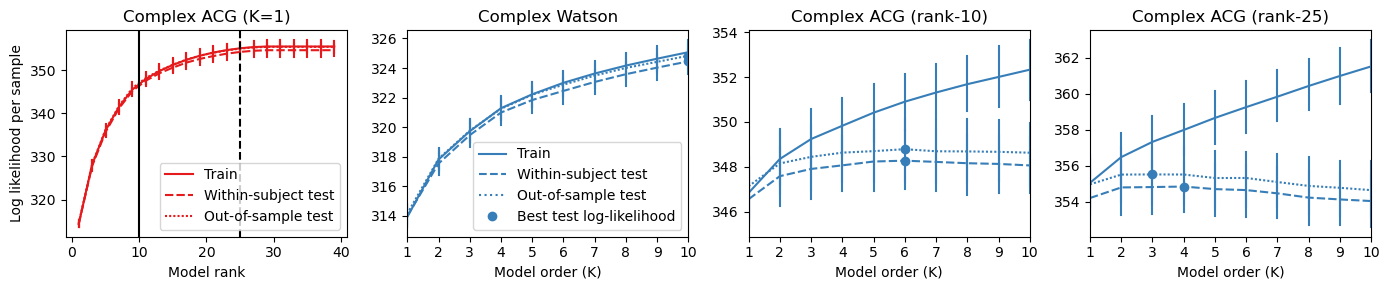

In [97]:
palette1 = sns.color_palette("Set1", n_colors=4)
fig,ax = plt.subplots(1,4,figsize=(14,3))

sns.lineplot(x='rank',y='loglik',style='dataset',data=dfREST[dfREST['modelname']=='Complex_ACG'],ax=ax[0],err_style='bars',color=palette1[0],legend=False);
ax[0].set_title('Complex ACG (K=1)')
ax[0].set_xlabel('Model rank')
ax[0].set_ylabel('Log likelihood per sample')
ax[0].axvline(x=10, color='k', linestyle='-')
ax[0].axvline(x=25, color='k', linestyle='--')
ax[0].legend(['Train','Within-subject test','Out-of-sample test'],loc='lower right')
# ax[0].legend(loc='lower right')

df_tmp = df2REST[df2REST['modelname']=='Complex_Watson']
sns.lineplot(x='K',y='loglik',style='dataset',data=df_tmp,ax=ax[1],err_style='bars',color=palette1[1],legend=False);
df_avg= df_tmp.groupby(['modelname','rank','dataset','K']).mean().reset_index()
df_avg_rank25 = df_avg[(df_avg['rank']==25) & (df_avg['dataset']=='Within-subject test')]
maxidx_rank25 = df_avg_rank25['loglik'].argmax()
ax[1 ].plot(df_avg_rank25['K'].iloc[maxidx_rank25],df_avg_rank25['loglik'].iloc[maxidx_rank25],'o',color=palette1[1])
df_avg_rank25 = df_avg[(df_avg['rank']==25) & (df_avg['dataset']=='Out-of-sample test')]
maxidx_rank25 = df_avg_rank25['loglik'].argmax()
ax[1 ].plot(df_avg_rank25['K'].iloc[maxidx_rank25],df_avg_rank25['loglik'].iloc[maxidx_rank25],'o',color=palette1[1])
ax[1].set_title('Complex Watson')
ax[1].set_ylabel('')
ax[1].set_xlabel('Model order (K)')
ax[1].set_xticks(np.arange(1,11))
ax[1].set_xlim([1,10])
ax[1].legend(handles=[plt.plot([],'-',color=palette1[1])[0],plt.plot([],'--',color=palette1[1])[0],plt.plot([],':',color=palette1[1])[0],plt.plot([],'o',color=palette1[1])[0]],labels=['Train','Within-subject test','Out-of-sample test','Best test log-likelihood'],loc='lower right')

df_tmp = df2REST[df2REST['modelname']=='Complex_ACG']
sns.lineplot(x='K',y='loglik',style='dataset',data=df_tmp[df_tmp['rank']==10],ax=ax[2],err_style='bars',color=palette1[1],legend=False);

df_avg= df_tmp.groupby(['modelname','rank','dataset','K']).mean().reset_index()
df_avg_rank10 = df_avg[(df_avg['rank']==10) & (df_avg['dataset']=='Within-subject test')]
maxidx_rank10 = df_avg_rank10['loglik'].argmax()
ax[2].plot(df_avg_rank10['K'].iloc[maxidx_rank10],df_avg_rank10['loglik'].iloc[maxidx_rank10],'o',color=palette1[1])
df_avg_rank10 = df_avg[(df_avg['rank']==10) & (df_avg['dataset']=='Out-of-sample test')]
maxidx_rank10 = df_avg_rank10['loglik'].argmax()
ax[2].plot(df_avg_rank10['K'].iloc[maxidx_rank10],df_avg_rank10['loglik'].iloc[maxidx_rank10],'o',color=palette1[1])

ax[2].set_title('Complex ACG (rank-10)')
ax[2].set_ylabel('')
ax[2].set_xlabel('Model order (K)')
ax[2].set_xticks(np.arange(1,11))
ax[2].set_xlim([1,10])

df_tmp = df2REST[df2REST['modelname']=='Complex_ACG']
sns.lineplot(x='K',y='loglik',style='dataset',data=df_tmp[df_tmp['rank']==25],ax=ax[3],err_style='bars',color=palette1[1],legend=False);
df_avg= df_tmp.groupby(['modelname','rank','dataset','K']).mean().reset_index()
df_avg_rank25 = df_avg[(df_avg['rank']==25) & (df_avg['dataset']=='Within-subject test')]
maxidx_rank25 = df_avg_rank25['loglik'].argmax()
ax[3].plot(df_avg_rank25['K'].iloc[maxidx_rank25],df_avg_rank25['loglik'].iloc[maxidx_rank25],'o',color=palette1[1])
df_avg_rank25 = df_avg[(df_avg['rank']==25) & (df_avg['dataset']=='Out-of-sample test')]
maxidx_rank25 = df_avg_rank25['loglik'].argmax()
ax[3].plot(df_avg_rank25['K'].iloc[maxidx_rank25],df_avg_rank25['loglik'].iloc[maxidx_rank25],'o',color=palette1[1])
ax[3].set_title('Complex ACG (rank-25)')
ax[3].set_ylabel('')
ax[3].set_xlabel('Model order (K)')
ax[3].set_xticks(np.arange(1,11))
ax[3].set_xlim([1,10])

plt.tight_layout()
plt.savefig('figs/RESTrealdata_modelorder_loglik.png',dpi=300,bbox_inches='tight')


In [98]:
pts_pr_subject_sum = np.array([279,279,279*2])
pts_pr_subject = [[284//2,274//2],[284//2,274//2],[284,274]]
num_subs = [155,155,100]
motorsocialinner = [0,0,0,0]
df_overlap = pd.DataFrame()
for m,modelname in enumerate(['Complex_ACG','Normal','euclidean','MACG']):
    for s,setname in enumerate(sets):
        entries = []
        try:
            posteriors = np.loadtxt('../data/results/116_results/posteriors/MOTORSOCIALmodelorder_realdata_'+modelname+'_K=2_rank=25_'+setname+'_posterior_inner'+str(motorsocialinner[m])+'.txt')
        except:
            continue

        for i in range(num_subs[s]):
            p = posteriors[:,i*pts_pr_subject_sum[s]:(i+1)*pts_pr_subject_sum[s]]
            if np.mean(p[0,:pts_pr_subject[s][0]]) < np.mean(p[0,pts_pr_subject[s][0]:]):
                p = 1-p

            ps = np.zeros((2,2)) #cluster, task
            ps[0,0] = np.mean(p[0,:pts_pr_subject[s][0]],axis=0) #cluster 0, motor
            ps[0,1] = np.mean(p[0,pts_pr_subject[s][0]:],axis=0) #cluster 0, social
            ps[1,0] = np.mean(p[1,:pts_pr_subject[s][0]],axis=0) #cluster 1, motor
            ps[1,1] = np.mean(p[1,pts_pr_subject[s][0]:],axis=0) #cluster 1, social
            entries.append({'traintest':new_setnames[s],'modelname':modelname,'task':'Motor','sub':i,'overlap':ps[0,0],'Cluster':1})
            entries.append({'traintest':new_setnames[s],'modelname':modelname,'task':'Social','sub':i,'overlap':ps[0,1],'Cluster':1})
            entries.append({'traintest':new_setnames[s],'modelname':modelname,'task':'Motor','sub':i,'overlap':ps[1,0],'Cluster':2})
            entries.append({'traintest':new_setnames[s],'modelname':modelname,'task':'Social','sub':i,'overlap':ps[1,1],'Cluster':2})
        df_overlap = pd.concat([df_overlap,pd.DataFrame(entries)],ignore_index=True)
        


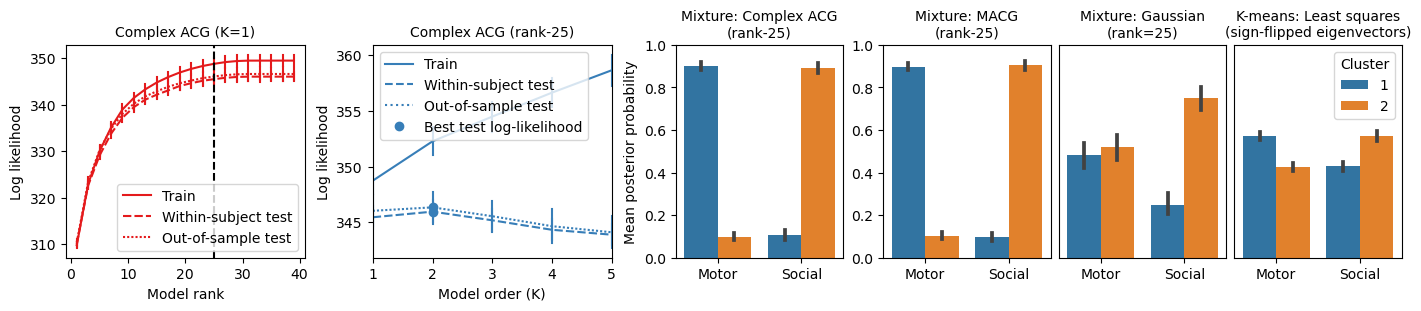

In [99]:
palette1 = sns.color_palette("Set1", n_colors=4)
fig,ax = plt.subplots(1,6,figsize=(14,3),width_ratios=[1,1,0.7,0.7,0.7,0.7],layout='constrained')

sns.lineplot(x='rank',y='loglik',style='dataset',data=dfMOTORSOCIAL[dfMOTORSOCIAL['modelname']=='Complex_ACG'],ax=ax[0],err_style='bars',color=palette1[0],legend=False);
ax[0].set_title('Complex ACG (K=1)',fontsize=10)
ax[0].set_xlabel('Model rank')
ax[0].set_ylabel('Log likelihood')
# ax[0].axvline(x=10, color='k', linestyle='-')
ax[0].axvline(x=25, color='k', linestyle='--')
ax[0].legend(['Train','Within-subject test','Out-of-sample test'],loc='lower right')

df_tmp = df2MOTORSOCIAL[df2MOTORSOCIAL['modelname']=='Complex_ACG']
sns.lineplot(x='K',y='loglik',style='dataset',data=df_tmp[df_tmp['rank']==25],ax=ax[1],err_style='bars',color=palette1[1],legend=False);
df_avg= df_tmp.groupby(['modelname','rank','dataset','K']).mean().reset_index()
df_avg_rank25 = df_avg[(df_avg['rank']==25) & (df_avg['dataset']=='Within-subject test')]
maxidx_rank25 = df_avg_rank25['loglik'].argmax()
ax[1].plot(df_avg_rank25['K'].iloc[maxidx_rank25],df_avg_rank25['loglik'].iloc[maxidx_rank25],'o',color=palette1[1])
df_avg_rank25 = df_avg[(df_avg['rank']==25) & (df_avg['dataset']=='Out-of-sample test')]
maxidx_rank25 = df_avg_rank25['loglik'].argmax()
ax[1].plot(df_avg_rank25['K'].iloc[maxidx_rank25],df_avg_rank25['loglik'].iloc[maxidx_rank25],'o',color=palette1[1])
ax[1].set_title('Complex ACG (rank-25)',fontsize=10)
ax[1].set_ylabel('Log likelihood')
ax[1].set_xlabel('Model order (K)')
ax[1].set_xticks(np.arange(1,11))
ax[1].set_xlim([1,5])
ax[1].legend(handles=[plt.plot([],'-',color=palette1[1])[0],plt.plot([],'--',color=palette1[1])[0],plt.plot([],':',color=palette1[1])[0],plt.plot([],'o',color=palette1[1])[0]],labels=['Train','Within-subject test','Out-of-sample test','Best test log-likelihood'],loc='upper left')


traintest = 'Out-of-sample test'

df_tmp = df_overlap[df_overlap['modelname']=='Complex_ACG']
sns.barplot(x='task',y='overlap',data=df_tmp[df_tmp['traintest']==traintest],ax=ax[2],hue='Cluster')
ax[2].set_title('Mixture: Complex ACG\n(rank-25)',fontsize=10)
ax[2].set_ylabel('Mean posterior probability')  
ax[2].set_xlabel('') 
ax[2].set_ylim([0,1])
ax[2].get_legend().remove()

df_tmp = df_overlap[df_overlap['modelname']=='MACG']
sns.barplot(x='task',y='overlap',data=df_tmp[df_tmp['traintest']==traintest],ax=ax[3],hue='Cluster')
ax[3].set_title('Mixture: MACG\n(rank-25)',fontsize=10)
ax[3].set_ylabel('')  
ax[3].set_xlabel('') 
ax[3].set_ylim([0,1])
ax[3].get_legend().remove()

df_tmp = df_overlap[df_overlap['modelname']=='Normal']
sns.barplot(x='task',y='overlap',data=df_tmp[df_tmp['traintest']==traintest],ax=ax[4],hue='Cluster')
ax[4].set_title('Mixture: Gaussian\n(rank=25)',fontsize=10)
ax[4].set_ylabel('')
ax[4].set_yticks([])
ax[4].set_xlabel('')
ax[4].set_ylim([0,1])
ax[4].get_legend().remove()

df_tmp = df_overlap[df_overlap['modelname']=='euclidean']
sns.barplot(x='task',y='overlap',data=df_tmp[df_tmp['traintest']==traintest],ax=ax[5],hue='Cluster')
ax[5].set_title('K-means: Least squares\n(sign-flipped eigenvectors)',fontsize=10)
ax[5].set_ylabel('')
ax[5].set_yticks([])
ax[5].set_xlabel('')
ax[5].set_ylim([0,1])

# sns.catplot(x='task',y='overlap',col='modelname',data=df_overlap[df_overlap['traintest']=='Train'],kind='bar',ax=ax[2],hue='cluster')

# plt.tight_layout()
plt.savefig('figs/MOTORSOCIALrealdata_modelorder_loglik.png',dpi=300,bbox_inches='tight')


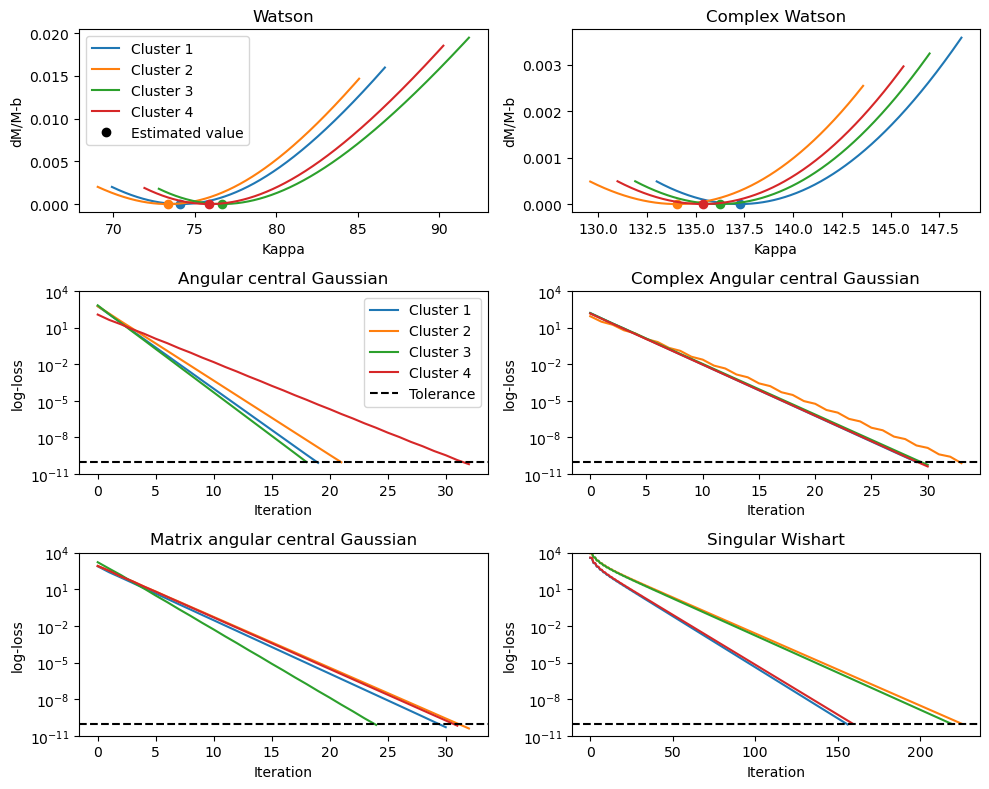

In [100]:
#2x3 subplot
palette = sns.color_palette("tab10")
modelnames5 = ['Watson','Complex_Watson','ACG','Complex_ACG','MACG','SingularWishart']
fig, ax = plt.subplots(3,2,figsize=(10,8))
for i,modelname in enumerate(modelnames5):
    lines = []
    for k in range(4):
        if 'Watson' in modelname:
            kappas = np.loadtxt('loss_curves/'+modelname+'_kappas'+str(k+1)+'.txt')
            fs = np.loadtxt('loss_curves/'+modelname+'_fs'+str(k+1)+'.txt')
            l = ax[i//2,i%2].plot(kappas,fs,label='Cluster '+str(k+1),color=palette[k])
            lines.append(l)
            minfs = np.min(fs)
            minfs_kappa = kappas[np.argmin(fs)]
            p = ax[i//2,i%2].plot(minfs_kappa,minfs,'o',label='Estimated value',color=palette[k])
            lines.append(p)
        else:
            loss = np.loadtxt('loss_curves/'+modelname+'_loss'+str(k+1)+'.txt')
            ax[i//2,i%2].plot(loss,color=palette[k])
            #plot dashes horizontal line at 1e-10
    if 'Watson' in modelname:
        ax[i//2,i%2].set_ylabel('dM/M-b')
        ax[i//2,i%2].set_xlabel('Kappa')
    else:
        ax[i//2,i%2].axhline(y=1e-10, color='k', linestyle='--')
        ax[i//2,i%2].set_ylabel('log-loss')
        ax[i//2,i%2].set_xlabel('Iteration')
        ax[i//2,i%2].set_yscale('log')
        ax[i//2,i%2].set_ylim([1e-11,1e4])
    if i==0:
        # ax[i//2,i%2].legend(handles=[lines[0][0],lines[2][0],lines[4][0],lines[6][0],lines[7][0]],labels=['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Estimated value'])
        ax[i//2,i%2].legend(handles=[lines[0][0],lines[2][0],lines[4][0],lines[6][0],plt.plot([],'ko')[0]],labels=['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Estimated value'])
        ax[i//2,i%2].set_title('Watson')
    elif i==2:
        ax[i//2,i%2].legend(['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Tolerance'])
        ax[i//2,i%2].set_title('Angular central Gaussian')
    elif i==4:
        ax[i//2,i%2].set_title('Matrix angular central Gaussian')
    elif i==1:
        ax[i//2,i%2].set_title('Complex Watson')
    elif i==3:
        ax[i//2,i%2].set_title('Complex Angular central Gaussian')
    elif i==5:
        ax[i//2,i%2].set_title('Singular Wishart')
    
plt.tight_layout()
plt.savefig('loss_curves.png')
    